In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 7: Probability and Hypothesis Testing

Last update: Feb 2, 2023

We often work with a dataset that has a finite number of observations (rows). However, we want to draw conclusion beyond the data we have collected. For example, we collect data from MUIC students, we discover an interesting pattern, we want to draw a conclusion for bigger population, not just MUIC students. 

This is where the probability theory comes in. Our data or observations is **believed** to be a random sample of some underlying "true" population. In order to draw any conclusion beyond the sample, we need a formal framework, the probability theory, to guide us. Understanding the connection between sample and population is vital in data analysis. 

Before we start, let's talk about a about the following concepts:

- **[Experiment](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29))**:
  A single occurrence with an outcome that is uncertain until we observe it. 
  <br>*For example, rolling a single die.*
- **[Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29)):**
  A possible result of a trial; one particular state of the world.
  <br>*For example:* `4`.
- **[Sample Space](https://en.wikipedia.org/wiki/Sample_space):**
  The set of all possible outcomes for the experiment. 
  <br>*For example,* `{1, 2, 3, 4, 5, 6}`.
- **[Event](https://en.wikipedia.org/wiki/Event_(probability_theory%29)):**
  A subset of outcomes that together have some property we are interested in.
  <br>*For example, the event "even die roll" is the set of outcomes* `{2, 4, 6}`. 
- **[Probability](https://en.wikipedia.org/wiki/Probability_theory):**
  The probability of an event with respect to a sample space is the "number of favorable cases" (outcomes from the sample space that are in the event) divided by the "number of all the cases" in the sample space (assuming "nothing leads us to expect that any one of these cases should occur more than any other"). Since this is a proper fraction, probability will always be a number between 0 (representing an impossible event) and 1 (representing a certain event).
<br>*For example, the probability of an even die roll is 3/6 = 1/2.*

In [2]:
# rolling a die 
print('roll=', np.random.randint(1,7))

roll= 5


In [3]:
n = 10000
obs = np.random.randint(1,7,size=n)

# even_count
even_count = len(obs[obs%2==0])

# approx P(even die roll)
print(even_count/n)

0.5052


## Random variables 

A random variable, $X$, is a mapping from a real number to an event. For example, the value of a roll of a die is a random variable. This variable, $X$, can take values 1 - 6. We don't know its exact value till the die roll is actually performed.

$$X = \left\{
    \begin{array}{ll}
        1 & \text{if die roll = 1}\\
        2 & \text{if die roll = 2}\\
        3 & \text{if die roll = 3}\\
        4 & \text{if die roll = 4}\\
        5 & \text{if die roll = 5}\\
        6 & \text{if die roll = 6}
    \end{array}\right.$$


Since each event is associated with a probability, we can talk about the probability of X being 1, 2, etc.

$$P(X=1) = P(\text{die roll 1}) = 1/6$$

Normally, we don't know the exactly value of a random variable because it will depend on the outcome of the experiment.

## Probability distribution

A probability distribution is a function that assigns a probability to every possible value of a random variable. For example, the random variable X that represents the value of a die rolls and can take values 1 to 6, each with a probability of 1/6 has a distribution: $P(X=i) = 1/6$, where i = 1,2,3,4,5,6


Random variables can be separated into two different classes:

- Discrete random variables
- Continuous random variables

### Discrete Random Variables

Discrete Random Variable have finitely countable outcomes. For example, the value of a coin toss can only be H or T, each with a probability of $1/2$. Similarly the value of a die roll can only be between 1 and 6

For discrete random variables where X can take a finite set of values, the probability distribution function (aka probability mass function), gives the probability $p(x)$ that X is exactly equal to some value. $p(x) = P(X=x)$, where x belongs to the finite set of values that are possible

A probability distribution function has two main properties:

$0 \leq p(x) \leq 1$ because all probabilities are in the interval $[0, 1]$
The sum of all probabilities $p(x)$ over all values of X is equal to $1$. The total weights for all values of the random variable must add to $1$.


#### Uniform distribution

A die roll can have 6 values, each value can occur with a probability of $1/6$. Each time we roll the die, we have an equal chance of getting each face. This is an example of uniform distribution. 

<BarContainer object of 6 artists>

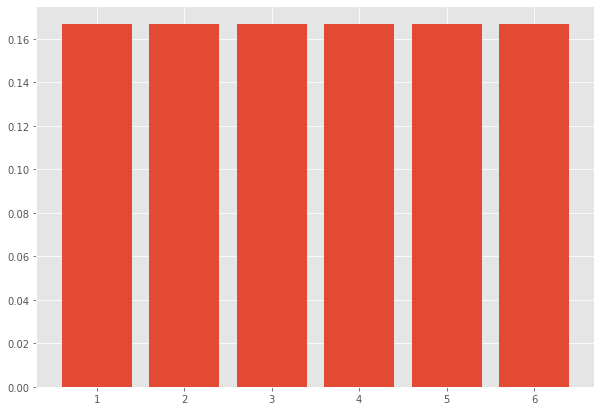

In [4]:
plt.figure(figsize=(10,7))
plt.bar([i for i in range(1,7)], [1/6] * 6)

#### Binomial distribution

A binomial distribution is used to describe successes and failures in a binary experiment. This can be very useful in an investment context as many of our choices tend to be binary like this. A single experiment which can result in success with probability $p$ and failure with probability $(1-p)$ is called a Bernoulli trial.

Let X be random variable such that:

$$X = \left\{
    \begin{array}{ll}
        1 & \text{if the Bernoulli trial succeeds}\\
        0 & \text{if the Bernoulli trial fails}
    \end{array}\right.$$
    
That means $P(X=1) = p$ and $P(X=0) = 1-p$. In some books, they write $X \sim Bernoulli(p)$.

If we perform $n$ **independent** Bernoulli trials and count how successes and fails we got. Let $Y$ be another random variable representing this count. Let $X_i$ be a random variable representing i-th Bernoulli trial.

$$Y = \sum_{i=1}^{n} X_i$$

Now we can look at probability distribution of $Y$. 
- $P(Y=0) = (1-p)^n$ 
- $P(Y=1) = {n \choose 1}(p)(1-p)^{n-1}$
- ...
- $P(Y=k) = {n \choose k}(p)^k(1-p)^{n-k}$
- ...
- $P(Y=n) = (p)^n$

Here, $Y$ is also known a binomial random variable and it is denoted as $Y \sim B(n, p)$.

<BarContainer object of 11 artists>

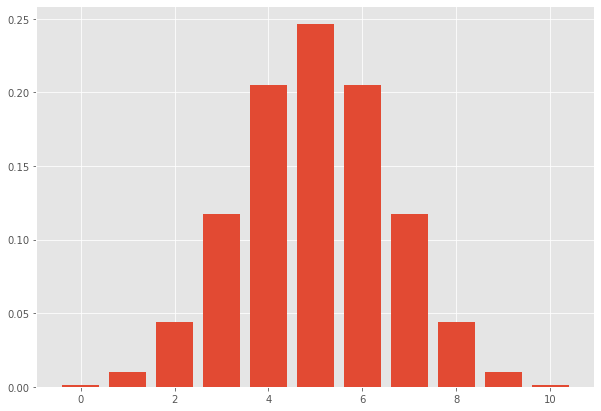

In [5]:
from scipy.special import comb 

n = 10
p = 0.5
x = [k for k in range(n+1)]
pmf = [ comb(n,k)*(p**k)*(1-p)**(n-k) for k in range(n+1)]

plt.figure(figsize=(10,7))
plt.bar(x, pmf)

## Continuous random variables

For continuous random variables (where X can take an infinite number of values over a continuous range), the probability of a single point, the probability that X is exactly equal to some value is zero. In this case, the probability distribution function, gives the probability over intervals which can include infinitely many outcomes. Here we define a **probability density function (PDF)**, $f(x)$, such that we can say:

$$P(a<X<b) = \int_a^b f(x) dx$$


Just like a probability distribution function $f(x)$ gives the probability that a random variable lies in a range, a **cumulative distribution function (CDF)** $F(x)$ describes the probability that a random variable is less than or equal to a given value.

$$F(x) = P(X \le x) = \int_{-\infty}^x f(x) dx $$


### Normal distribution

Many important tests and methods in statistics, and by extension, finance, are based on the assumption of normality. A large part of this is due to the results of the Central Limit Theorem (CLT) which states that the sum of many independent random variables tends toward a normal distribution, even if the original variables themselves are not normally distributed. The convenience of the normal distribution finds its way into certain algorithmic trading strategies as well.


Normal distributions are described by two parameters: $\mu$ and $\sigma^2$, where $\mu$ is the distribution mean and $\sigma$ is the standard deviation). The probability density of the normal distribution is:


$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

And is defined for $-\infty \lt x \lt \infty$. When we have $\mu = 0$ and $\sigma = 1$, we call this the **standard normal distribution**.

By changing $\mu$ and $\sigma$ of the normal distribution, we can change the depth and width of the bell curve. With a larger standard deviation, the values of the distribution are less concentrated around the mean.


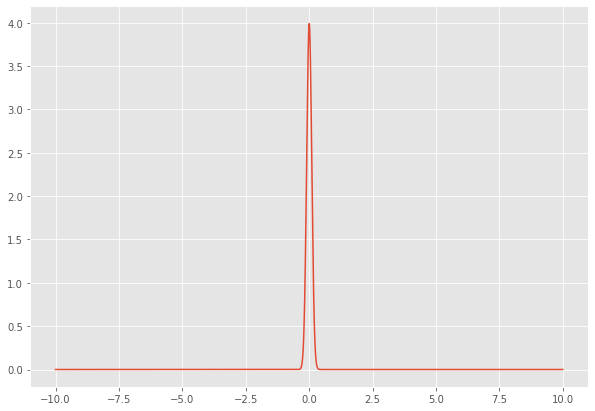

In [6]:
from scipy.stats import norm

x = np.arange(-10, 10, 0.001)

mu = 0
variance = 0.1
plt.figure(figsize=(10,7))
plt.plot(x, norm.pdf(x,mu,variance))

### The Central Limit Theorem

One reason the normal distribution is so useful is the central limit theorem (CLT). Informally, the CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger: 

In particular, if $x_1, ..., x_n$ are **independent and identically distributed (IID)** random variables (from any distribution). Let $Y = \frac{\sum_i^N x_i}{N}$.

From the CLT, we will have that $Y \sim Normal(\mu,\sigma)$ as the N goes to infinity. 


(array([2.000e+00, 2.000e+00, 4.000e+00, 7.000e+00, 1.100e+01, 2.800e+01,
        3.900e+01, 7.600e+01, 1.100e+02, 1.670e+02, 2.460e+02, 3.340e+02,
        5.330e+02, 7.380e+02, 9.220e+02, 1.335e+03, 1.588e+03, 1.928e+03,
        2.410e+03, 2.719e+03, 3.001e+03, 3.318e+03, 3.396e+03, 3.336e+03,
        3.407e+03, 3.384e+03, 3.140e+03, 2.734e+03, 2.451e+03, 2.032e+03,
        1.618e+03, 1.332e+03, 1.036e+03, 8.040e+02, 6.050e+02, 3.970e+02,
        3.130e+02, 1.730e+02, 1.240e+02, 8.400e+01, 5.600e+01, 2.400e+01,
        1.700e+01, 8.000e+00, 7.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([18.997  , 19.01832, 19.03964, 19.06096, 19.08228, 19.1036 ,
        19.12492, 19.14624, 19.16756, 19.18888, 19.2102 , 19.23152,
        19.25284, 19.27416, 19.29548, 19.3168 , 19.33812, 19.35944,
        19.38076, 19.40208, 19.4234 , 19.44472, 19.46604, 19.48736,
        19.50868, 19.53   , 19.55132, 19.57264, 19.59396, 19.61528,
        19.6366 , 19.65792, 19.67924

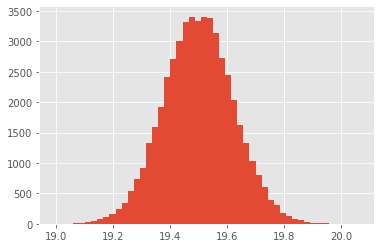

In [7]:
n = 1000
m = 50000

avg = []
for i in range(m):
    #x = np.random.randint(1,10,n) # uniform[1,10)
    x = np.random.randint(1,10,n) + np.random.randint(10,20,n) # uniform[1,10) + uniform[10,20)
    avg.append(np.mean(x))

plt.hist(avg,bins=50)

# mu = mu
# sd = sd / srqt(n)

In [8]:
np.array(avg).mean()

19.50080482

### Expectation

Although you dont know the actual value of a random variable, you can always find out its **expectation**. Suppose we have a random variable $X$. The expectation of $X$, $E[X]$, is just a number.

$$E[X] = \int_{-\infty}^{\infty}  x f(x) dx $$

or

$$E[X] = \sum_{i} x_i p(x_i)$$


The concept of expectation is similar to that of central tendency, but it is for distributions.

Let $Y \sim Binomial(n=10,p=0.5)$. We don't know the value of $Y$ but we know $E[Y] = 10(0.5) = 5$


#### Mean and Variance of a random variable

In general, the **mean** and **variance** of a random variable $X$ is given by: $E[X]$ and $E[(X-E[X])^2]$ respectively. 


When $X \sim Normal(\mu,\sigma)$, it can be shown that:

$$E[X] = \mu$$

and

$$E[(X-E[X])^2] = \sigma^2$$



## Example

Suppose you collect height data, $H = [h_1,h_2,h_3,...,h_n]$, from MUIC students. One way to approach this is to think of observations as IID random variable. Namely, $h_i$ is a random variable drawn from some unknown distribution $D$, or $h_i \sim D$ and $h_i$ is independent of $h_j$ for any $i,j$. 

Our goal is when we observe the value of $h_i$, we can then learn something about the underlying distribution $D$.

From CLT, we know that the average height from the sample will be close to the mean of $D$ as $N$ goes to infinity.

In [9]:
H = [172, 172, 171, 173, 176, 171, 177, 168, 175, 169, 172, 175, 174,
       168, 173, 175, 175, 175, 172, 173, 172, 173, 170, 172, 168, 177,
       175, 175, 172, 172, 171, 172, 168, 175, 172, 173, 170, 174, 175,
       176, 172, 169, 171, 172, 172, 168, 174, 173, 170, 172, 175, 173,
       172, 177, 172, 174, 172, 169, 172, 170, 174, 171, 177, 168, 171,
       169, 168, 172, 172, 173, 169, 175, 174, 168, 170, 172, 174, 168,
       175, 174, 172, 173, 173, 175, 169, 177, 171, 174, 174, 177, 169,
       168, 171, 170, 175, 172, 176, 175, 177, 173]

(array([17., 14., 34., 25., 10.]),
 array([168. , 169.8, 171.6, 173.4, 175.2, 177. ]),
 <BarContainer object of 5 artists>)

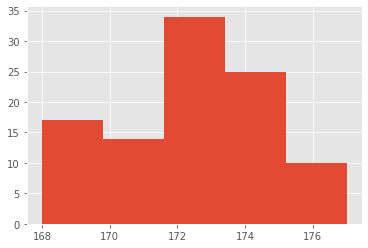

In [10]:
plt.hist(H,bins=5)

## Statistical Hypothesis Testing

In our previous lecture, we talked about summary statistics that are useful for describing data, and probability theory that is a mathematical framework for random processes. Today we will talk more about the "science" part in the data science, which involves forming and testing hypotheses about our data and the processes that "generate" it.

One of the most important aspect of data science is to come up with questions and hypotheses. These hypotheses are then verified whether they are likely to be true based on the data. For example, suppose we collect outcomes of indepedent coin flips $\{H,H,T,H,T,T,T,H,H,H,H\}$, we might ask "whether the coin is fair" and form a hypothesis like "this coin is fair". A hypothesis is usually an assertion that can be translated into statistics about data. It could be something like "First-year CS students prefer Python to Java". 

A typical setup of a statistical test is as follows. First, we form a "null hypothesis" $H_0$ that represents some default position. Then, we form an alternative hypothesis $H_1$ that we'd like to compare. Next, we compute some statistics to decide whether we can "reject" the null hypothesis $H_0$ as false or not. 

Formally, a statistical test is a procedure so that we, for a given observation $x \in E$, can decide whether it is conceivable that the unknown parameter, $\theta$, is to be found in $\Theta_0$ or whether we have to use the entire parameter space $\Theta$.

This is formalized as follows. We call the hypothesis that $\theta \in \Theta_0$ the null-hypothesis
and write

$$
H_0: \theta \in \Theta_0
$$

and, the alternative hypothesis, $H_1$ is:

$$
H_1: \theta \in \Theta \backslash \Theta_0
$$



## Example: Fair Coin?

Suppose we have a coin which we are not sure whether it is a fair coin or not. We flip this coin $n$ times and collect the outcomes.

In [11]:
import random

def toss(p):
    if random.random() < p:
        return 'H'
    else: 
        return 'T'


# Case 1: The coin is actually fair
n = 100
p = 0.5
X = [ toss(p) for i in range(n) ]
X[:10]

['H', 'T', 'T', 'H', 'T', 'T', 'H', 'T', 'H', 'H']

We assume that each coin toss is a Bernoulli trial with probility $p$ of landing heads. So, our null hypothesis is "the coin is fair" -- $p = 0.5$ and we will test this against the alternative hypothesis $p \ne 0.5$

As you already know, when we flip the coin independent $n$ times, the distribution of "number of heads" is $Binomial(n,p)$ i.e. sum of Bernoulli is Binomial. 

When $n \rightarrow \infty$, $Binomial(n,p)$ can be approximated by $Normal(\mu,\sigma)$. Instead of working directly with $Binomial(n,p)$, we will use $Normal(\mu,\sigma)$ to simplify things.

So, if we believe that coin is fair, the number of heads (RV) will be distributed close to $Normal(\mu,\sigma)$ where $\mu = n*0.5$ and $\sigma = \sqrt{n*0.5(1-0.5)}$.


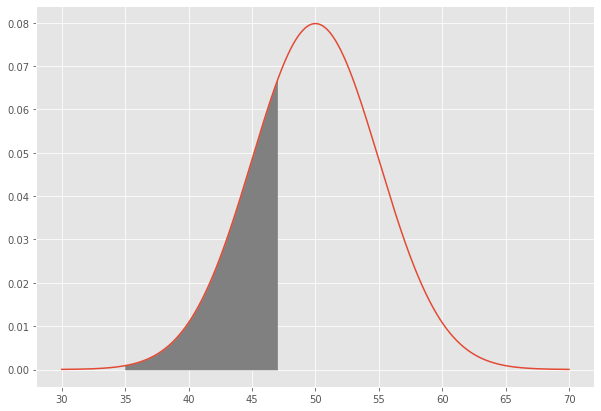

In [12]:
from scipy.stats import norm

x = np.arange(30, 70, 0.01)
mu = n*0.5
variance = n*0.5*(1-0.5)
sd = variance**0.5
plt.figure(figsize=(10,7))
y = norm.pdf(x,mu,sd)
plt.plot(x, y)

# P( 35 <'H'< 47 )
shaded_x = np.arange(35,47,0.01)
shaded_y = norm.pdf(shaded_x,mu,sd)
plt.fill_between(shaded_x,shaded_y,color='gray')

In [13]:
norm.cdf(47,mu,sd)-norm.cdf(35,mu,sd)

0.2729032197184435

### Significance level

Next important step in hypothesis testing is to choose a **significance level**, commonly denoted by $\alpha$, which is the probability of rejecting the null hypothesis when it is actually true. The significance level is usually set to 5% or 1%. Let's go with 5% for now.

(40.200180077299734, 59.799819922700266)


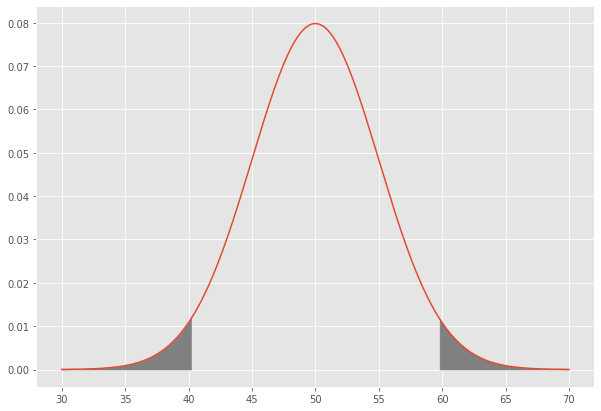

In [14]:
# Let's find out the interval that is centered at the mean and cover 95% of the AUC
alpha = 0.05
interval = norm.interval(1-alpha, mu, sd)
print(interval)

# plot again
plt.figure(figsize=(10,7))
y = norm.pdf(x,mu,sd)
plt.plot(x, y)

# alpha interval
shaded_x = np.arange(30,interval[0],0.01)
shaded_y = norm.pdf(shaded_x,mu,sd)
plt.fill_between(shaded_x,shaded_y,color='gray')

shaded_x = np.arange(interval[1],70,0.01)
shaded_y = norm.pdf(shaded_x,mu,sd)
plt.fill_between(shaded_x,shaded_y,color='gray')


According to our chosen 5% significance level, we will reject the null hypothesis $H_0$ if the number of heads in $X$ falls into the shaded region. 


To reason about this, if we assume that $p$ is really 0.5, the number of heads (RV) should distributed as shown above and there is just 5% chance that it falls into the shaded region. In other words, if $H_0$ is really true, there is only 5% that we are going to make a mistake.


In [15]:
# Number of heads in X
num_heads = len([x for x in X if x == 'H'])
print("Number of heads:", num_heads)

reject_null = not (interval[0] < num_heads < interval[1])
print("Can reject null hypothesis?", reject_null)

if reject_null:
    print("CONCLUSION: Coin is NOT fair (significance level = {})".format(alpha))
else: 
    print("CONCLUSION: Coin is fair (significance level = {})".format(alpha))

Number of heads: 61
Can reject null hypothesis? True
CONCLUSION: Coin is NOT fair (significance level = 0.05)


### p-value

In modern reserch and scientific studies, researchers use p-value extensively in their studies. What exactly is p-value?

In short, **p-value** is the probablity that we would see a value at least as extreme as the one we actually observed assuming $H_0$ is true.

Another way to think about p-value, is area under the PDF beyond the observed value.

In [16]:
if num_heads > mu:
    p_value = 1 - norm.cdf(num_heads, mu, sd) # P(v > num_heads)
else:
    p_value = norm.cdf(num_heads, mu, sd) # P(v < num_heads)
    
print('p-value =', p_value)

p-value = 0.01390344751349859


### One-sided vs Two-sided

The previous test is also known as "two-sided test" where we have $H_0$ stating that $p=0.5$ and $H_1$ stating that $p\ne0.5$.


Alternatively, we could try to perform "one-sided" version:

- H_0: $p=0.5$ (the coin is fair)
- H_1: $p>0.5$ (the coin lands on heads more often than tails)

For a significance level, $\alpha$, one-sides tests consider only either left- or right-tail of the distribution, not both.

58.22426813475736


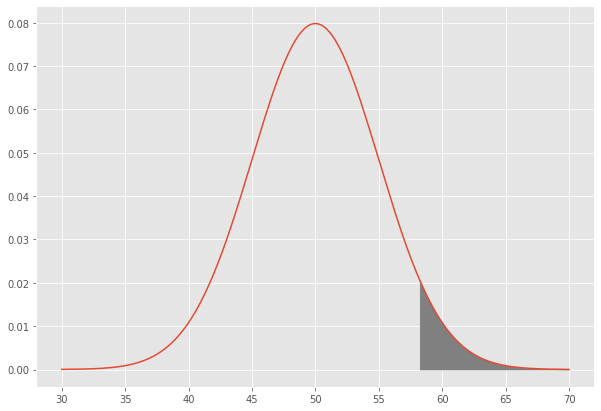

In [17]:
alpha = 0.05
threshold = norm.ppf(1-alpha, mu, sd)
print(threshold)

# plot again
plt.figure(figsize=(10,7))
y = norm.pdf(x,mu,sd)
plt.plot(x, y)

shaded_x = np.arange(threshold,70,0.01)
shaded_y = norm.pdf(shaded_x,mu,sd)
plt.fill_between(shaded_x,shaded_y,color='gray')

In [18]:
reject_null = (num_heads > threshold)
print("Can reject null hypothesis?", reject_null)

if reject_null:
    print("CONCLUSION: Coin lands on heads more often (signifance level = {})".format(alpha))
else: 
    print("CONCLUSION: Coin is fair (signifance level = {})".format(alpha))

Can reject null hypothesis? True
CONCLUSION: Coin lands on heads more often (signifance level = 0.05)


## Hypothesis testing guideline

In practice, when we do hypothesis testing. We follow the following steps:
1. Specify the null and alternative hypotheses.
2. Using the sample data and assuming the null hypothesis is true, calculate the value of the *test statistic*.
3. Using the known distribution of the test statistic, calculate the P-value: "If the null hypothesis is true, what is the probability that we'd observe a more extreme test statistic in the direction of the alternative hypothesis than we did?" (Note how this question is equivalent to the question answered in criminal trials: "If the defendant is innocent, what is the chance that we'd observe such extreme criminal evidence?")
4. Set the significance level, α, to be small — 0.01, 0.05, or 0.10. Compare the P-value to α. If the P-value is less than (or equal to) α, reject the null hypothesis in favor of the alternative hypothesis. If the P-value is greater than α, do not reject the null hypothesis.


### Test statistics

A test statistic is a random variable that is calculated from sample data and used in a hypothesis test. You can use test statistics to determine whether to reject the null hypothesis. The test statistic compares your data with what is expected under the null hypothesis. The test statistic is used to calculate the p-value.

A test statistic measures the degree of agreement between a sample of data and the null hypothesis. Its observed value changes randomly from one random sample to a different sample. A test statistic contains information about the data that is relevant for deciding whether to reject the null hypothesis. The sampling distribution of the test statistic under the null hypothesis is called the null distribution. When the data show strong evidence against the assumptions in the null hypothesis, the magnitude of the test statistic becomes too large or too small depending on the alternative hypothesis. This causes the test's p-value to become small enough to reject the null hypothesis.

For example, the test statistic for a Z-test is the Z-statistic, which has the standard normal distribution under the null hypothesis. Suppose you perform a two-tailed Z-test with an α of 0.05, and obtain a Z-statistic (also called a Z-value) based on your data of 2.5. This Z-value corresponds to a p-value of 0.0124. Because this p-value is less than α, you declare statistical significance and reject the null hypothesis.

Different hypothesis tests use different test statistics based on the probability model assumed in the null hypothesis. Common tests and their test statistics include:

| Hypothesis test	| Test statistic |
|-------------------|----------------|
| Z-test	| Z-statistic |
| t-tests	| t-statistic |
| ANOVA	| F-statistic |
| Chi-square tests	| Chi-square statistic |


### Example: Quiz scores (t-test)

We believe that quiz scores of a class distributed normally with $\mu = 50$. Given an observed scores, perform a hypothesis testing to determine whether the mean is really 50.

In [19]:
scores = np.array([46.85305221, 26.1675956 , 43.95835927, 63.14016061, 83.64057177, 
                35.47509908, 60.86484489, 53.73799298, 92.38937915, 55.74113059,
                59.24882812, 48.35935207, 73.77349993, 53.10609059, 36.48630154, 
                53.14600263, 54.00135143, 60.63089924, 95.51964724, 73.66544803, 
                66.37856748, 68.18856184, 32.42389482, 62.27084733, 61.51821799,
                36.85036105, 32.35595856, 76.17190358, 57.29816995, 60.25821504, 
                86.55732566, 57.09009663, 48.04988424, 52.77233494, 94.30381766, 
                69.08847148, 52.93718782, 59.99637199, 56.91433885, 77.53143737,       
                58.17739352, 58.34612257, 55.75442827, 76.83333842, 54.59777636, 
                36.47049618, 94.87000232, 45.75892031, 90.5429917 , 36.67837733])


### State your hypotheses

$H_0$: $\mu_R = 50$

$H_1$: $\mu_R \ne 50$



To test this hypothesis, we will use "one-sample t-test"

In [20]:
from scipy.stats import ttest_1samp

# two-sided by default
print(ttest_1samp(scores, 50))

Ttest_1sampResult(statistic=3.9260839442090183, pvalue=0.0002698038841968013)


From the test, we have p-value < 0.05. Hence, we can **reject** the null hypothesis.

<div class="alert alert-block alert-success">
    <b>Your Task: Height of Sunflowers </b>
A biologist was interested in determining whether sunflower seedlings treated with an extract from Vinca minor roots resulted in a lower average height of sunflower seedlings than the standard height of 15.7 cm. The biologist treated a random sample of n = 33 seedlings with the extract and subsequently obtained the following heights:
</div>

In [21]:
heights = [
    11.5,11.8,15.7,16.1,14.1,10.5,9.3,15.0,11.1,
    15.2,19.0,12.8,12.4,19.2,13.5,12.2,13.3, 
    16.5,13.5,14.4,16.7,10.9,13.0,10.3,15.8, 
    15.1,17.1,13.3,12.4,8.5,14.3,12.9,13.5] 

### State your hypothesis

- $H_0$

- $H_1$

In [22]:
# Perform one-sided one-sample t-test
# HINT: you can still use ttest_1samp()


### State your conclusion


<div class="alert alert-block alert-success">
  <b>Your Task: Teaching Evaluation</b> A teacher is trying to determine whether students have improved before and after his teaching. Here are the students' scores:
</div>

In [23]:
# (before, after)
scores = [
    (19,22),
    (26,25),
    (32,36),
    (24,32),
    (49,49),
    (42,46),
    (23,31),
    (53,52),
    (26,30),
    (39,42),
    (38,44)]

### State your hypothesis

- $H_0$

- $H_1$

In [24]:
# Checkout out ttest_rel()

### State your conclusion

<div class="alert alert-block alert-success">
  <b>Your Task: Teaching Evaluation (Again)</b> A teacher is teaching two sections. He's trying to determine whether students from one section is any better than another section.
</div>

In [25]:
section1 = [66.73181413018435, 72.34781959216814, 82.81281092111428, 85.302756300001, 76.60265743703683, 73.71493236840955, 71.00862208214622, 83.80075525961186, 75.70178871797536, 89.10113324964188, 79.98801223539078, 68.94738567344827, 86.68422258279321, 77.9228740100482, 72.23098047291438, 68.20056010934172, 80.27767666615648, 86.0087034749179, 81.76310668478597, 84.3250442635123, 94.47653473847244, 86.39960006757421, 75.70004400988884, 83.82490515435136, 66.39399253995862, 74.9287360500244, 88.93408337280434, 69.60312619095691, 88.84465486550141, 76.54334003261455]
section2 = [66.53772374128279, 87.21041863159333, 84.50543375709013, 69.0971313456738, 69.40694803534282, 80.38223595666314, 81.80758767029867, 85.8209311495314, 88.09122178658701, 71.6139670260851, 76.61974173545491, 64.92823503456047, 78.1055609007175, 68.78465266104801, 88.77865507432254, 87.22157878796556, 64.75649238653646, 74.93588453017624, 61.796216350443935, 65.48260736406938, 83.03821405813717, 65.04895213792253, 61.36035394432241, 75.99279769090847, 78.22997086212371, 88.80304525459626, 79.38130033341838, 65.61789150881347, 79.66064597508242, 89.55399363548264]

### State your hypothesis

- $H_0$

- $H_1$

In [26]:
# Checkout out ttest_ind()

### State your conclusion

<div class="alert alert-block alert-success">
  <b>Your Task: Is it normal?</b> Suppose you collect height data from your friends. Perform a test to check wheter the data is normally distributed. Read more here <a href="https://en.wikipedia.org/wiki/Normality_test">https://en.wikipedia.org/wiki/Normality_test</a>
</div>

In [27]:
data = [169, 157, 163, 173, 152, 165, 163, 154, 170, 166, 157, 172, 
        166, 150, 152, 171, 167, 161, 160, 166, 167, 174, 164, 150, 
        152, 160, 154, 167, 159, 151, 159, 151, 158, 166, 162, 163, 
        158, 153, 170, 160, 174, 165, 152, 163, 167, 165, 151, 173, 171, 160]

(array([9., 3., 2., 4., 5., 6., 7., 5., 4., 5.]),
 array([150. , 152.4, 154.8, 157.2, 159.6, 162. , 164.4, 166.8, 169.2,
        171.6, 174. ]),
 <BarContainer object of 10 artists>)

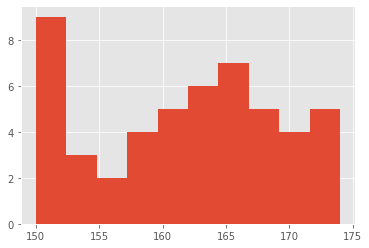

In [28]:
plt.hist(data)

### State your hypothesis

- $H_0$

- $H_1$

In [29]:
# check out normaltest

### State your conclusion

### Common misunderstandings of p-values

From: https://en.wikipedia.org/wiki/Misunderstandings_of_p-values


1. **The p-value is not the probability that the null hypothesis is true, or the probability that the alternative hypothesis is false.** A p-value can indicate the degree of compatibility between a dataset and a particular hypothetical explanation (such as a null hypothesis). Specifically, the p-value can be taken as the prior probability of an observed effect given that the null hypothesis is true—which should not be confused with the posterior probability that the null hypothesis is true given the observed effect (see prosecutor's fallacy). In fact, frequentist statistics does not attach probabilities to hypotheses.
2. **The p-value is not the probability that the observed effects were produced by random chance alone.** The p-value is computed under the assumption that a certain model, usually the null hypothesis, is true. This means that the p-value is a statement about the relation of the data to that hypothesis.
3. **The 0.05 significance level is merely a convention.** The 0.05 significance level (alpha level) is often used as the boundary between a statistically significant and a statistically non-significant p-value. However, this does not imply that there is generally a scientific reason to consider results on opposite sides of any threshold as qualitatively different, and the common choice of 0.05 as the threshold is only a convention.
4. **The p-value does not indicate the size or importance of the observed effect.** A small p-value can be observed for an effect that is not meaningful or important. In fact, the larger the sample size, the smaller the minimum effect needed to produce a statistically significant p-value (see effect size).
